# Welcome
### Seminar in data sceince, project notebook
* Tel Aviv university, department of economics
* Authors: Elad Golan & Dov Tuch
* Fraud Detection in car insurance  

# **Part 0 - Load packages and dataset**

### 0.a - Packages 

In [1]:
#imort packages
import numpy as np # linear algebra
import pandas as pd # Data frames
import seaborn as sns # plots 
import matplotlib.pyplot as plt #plots
import sklearn # Data science package
from sklearn.impute import SimpleImputer # for replace NA with avarge
from sklearn.model_selection import train_test_split  # for spliting the data
from sklearn.ensemble import RandomForestClassifier # RF classifier
from sklearn.tree import plot_tree 
from sklearn.inspection import permutation_importance  #feature importance
from sklearn.pipeline import make_pipeline 
from sklearn.svm import SVC # SVM classifier
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif #feature selection
from sklearn.preprocessing import StandardScaler # normlize features
from sklearn.naive_bayes import BernoulliNB , ComplementNB, CategoricalNB #NB classifiers 
# for evaluating preformance
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,fbeta_score, precision_recall_curve,auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
##
from collections import Counter
import researchpy as rp #for crosstab
import scipy.stats as stats # chi^2 test
from scipy.stats import pearsonr #correlation
import random #  for comuting random seed
 #preprocessing
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.one_hot import OneHotEncoder
##
import imblearn
from imblearn.over_sampling import SMOTE #oversampling
from imblearn.metrics import geometric_mean_score #metric
from imblearn.under_sampling import NearMiss #undersampling


In [2]:
np.random.seed(2020)

### 0.b - Load Vechicle Insures Dataset 

In [3]:
url = "https://raw.githubusercontent.com/Eladgo10/DS-Seminar-project-/main/fraud_oracle.csv" #github link
dataset = pd.read_csv(url)
dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
dataset.columns

# **Part 1 - Desprective Statistics**

### 1.a Describe numeric variables

In [ ]:
dataset.describe()


### 1.b Describe qualtive features

In [ ]:
dataset.describe(include=['object'])

### 1.c intresting variablas distrabution - bar plots, chi^2 test, common distrabution

In [ ]:
print(dataset['FraudFound_P'].value_counts(),'\n') # 923 frauds and 14497 not fraud - outcome
print(dataset['AgeOfPolicyHolder'].value_counts(),'\n')
print(dataset['WitnessPresent'].value_counts(), '\n')
print(dataset['PoliceReportFiled'].value_counts())


#### bar plots

In [ ]:
# creating data for the plot
data_FraudFound_P = pd.DataFrame({'category':['Not Fraud', 'Fraud'],
                     'counts': dataset['FraudFound_P'].value_counts().values,
                     'percentage': [round(sum(dataset.FraudFound_P == 0)/len(dataset), 3)*100 ,
                                    round(sum(dataset.FraudFound_P == 1)/len(dataset), 3)*100]
                    })
 

plt.figure(figsize=(8,8))
colors_list = ['tab:blue', 'tab:red']
graph = plt.bar(data_FraudFound_P.category,data_FraudFound_P.counts, color = colors_list)
plt.title("Figure 1: Percentage of Fraud and not fraud")

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data_FraudFound_P.percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [ ]:
sns.catplot(y="Make", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Make and Fraud")
plt.show()


In [ ]:
sns.catplot(x="AccidentArea", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AccidentArea and Fraud")
plt.show()


In [ ]:
sns.catplot(x="Sex", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


In [ ]:
sns.catplot(x="Month", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Month and Fraud")
plt.show()


In [ ]:
sns.catplot(x="MaritalStatus", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


In [ ]:
sns.catplot(x="DriverRating", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "DriverRating and Fraud")
plt.show()


In [ ]:
sns.catplot(x="Deductible", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "deductible and Fraud")
plt.show()

In [ ]:
sns.catplot(y="AgeOfVehicle", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgeOfVehicle and Fraud")
plt.show()

In [ ]:
sns.catplot(x="WitnessPresent", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "WitnessPresent and Fraud")
plt.show()

In [ ]:
sns.catplot(x="AgentType", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgentType and Fraud")
plt.show()

In [ ]:
sns.catplot(x="PastNumberOfClaims", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PastNumberOfClaims and Fraud")
plt.show()

In [ ]:
sns.catplot(x="PoliceReportFiled", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PoliceReportFiled and Fraud")
plt.show()

In [ ]:
dataset.columns[~dataset.columns.isin(["Age", 'Month'])]

#### χ^2 test

In [ ]:
col_names = dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    col_names = col_names[col_names != i]
    for j in col_names:
        crosstab, test_results, expected = rp.crosstab(dataset[i], dataset[j],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
        if test_results['results'][1] < 0.05:
            print(i + ' ' + j + ':')
            print(test_results)
            print('\n')
    print('****** new ******')
    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] < 0.05:
        print(i + ':')
        print(test_results)
        print('\n')

    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] > 0.05:
        print(i + ':')
        print(test_results)
        print('\n')


#### common distrabution

In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P)


In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    print(pd.crosstab(dataset[i], dataset.FraudFound_P))
    print(pd.crosstab(dataset[i], dataset.FraudFound_P, normalize = 'columns'))
   

# **Part 2 - Data preproccesing** 

### 2.a drop irrelevant colmuns


 Function for dropping Irrelevant_colmuns - PolicyType, PolicyNumber


In [4]:
def Irrelevant_col(df , drop):
    df.drop(drop, axis=1, inplace=True)


#drop in my data set    
drop = ["PolicyType","PolicyNumber"] 
dataset_new = dataset
Irrelevant_col(dataset_new, drop)

dataset_new

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#### 2.b dealing non available values
 

changing the zero values to nan values in columns: Age, DayOfWeekClaimed, weekclaimed

In [5]:
#Age
print(sum(dataset['Age']  == 0))
dataset.loc[dataset['Age'] == 0, 'Age'] = np.nan

#DayOfWeekClaimed
print(dataset['DayOfWeekClaimed'].unique())
dataset[dataset['DayOfWeekClaimed'] == '0'] # obs 1516 has a 
dataset.loc[dataset['DayOfWeekClaimed'] == 0, 'DayOfWeekClaimed'] = np.nan

#MonthClaimed
print(sum(dataset['MonthClaimed']  == '0'))
dataset.loc[dataset['MonthClaimed'] == '0', 'DayOfWeekClaimed'] = np.nan

320
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
1


Null values of age, day of week - replacing with mean

In [6]:
# removing rows
dataset_new_rem = dataset_new.dropna(subset = ['Age'])
dataset_new_rem = dataset_new_rem.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_rem.isnull().sum())

# avereging
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
# We instantiated a SimpleImputer object looking for missing values that are represented
#by np.NaN and asking Scikit-Learn to use the 'mean' as its strategy. 
#This means that any np.NaN values will be imputed by the columns mean.

dataset_new_avg = dataset_new
imputer=imputer.fit(dataset_new_avg[['Age']])
dataset_new_avg[['Age']]=imputer.transform(dataset_new_avg[['Age']])
dataset_new_avg = dataset_new_avg.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_avg.isnull().sum())

### 2.c Dealing with categorials features

In [7]:
dataset_new.dtypes # can we see most of the variabales are categorial

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea             object
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus            object
Age                     float64
Fault                    object
VehicleCategory          object
VehiclePrice             object
FraudFound_P              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year                      int64
BasePolicy               object
dtype: o

In [8]:
#make a copy of the data for making changes
y =  dataset_new.FraudFound_P.copy()
X = dataset_new.drop('FraudFound_P', axis = 1, inplace=False ).copy()

Binary variables zero one coding:

In [9]:
cols = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
y_val = ['Urban','Female','Policy Holder', 'Yes', 'Yes','External']
x_val = ['Rural', 'Male', 'Third Party', 'No', 'No', 'Internal']

for i in range(len(cols)):
    X_idx1 = X[cols[i]]==y_val[i]
    X_idx2 = X[cols[i]]==x_val[i]

    X.loc[list(X_idx1),cols[i]]=1
    X.loc[list(X_idx2),cols[i]]=0

for i in range(len(cols)):
    X[cols[i]] = X[cols[i]].astype('int')
    
X.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea              int64
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                       int64
MaritalStatus            object
Age                     float64
Fault                     int64
VehicleCategory          object
VehiclePrice             object
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled         int64
WitnessPresent            int64
AgentType                 int64
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year                      int64
BasePolicy               object
dtype: object

Ordianal categorial featurs:

In [10]:
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)
X2 = ord_encoder.fit_transform(X)
X2.loc[X2["DayOfWeekClaimed"] == -1.0,"DayOfWeekClaimed"] = 0
X2.loc[X2["MonthClaimed"] == -1.0,"MonthClaimed"] = 0

ordianal categorial featurs - taking the avg for each category 


In [11]:
col_map = [{'Days_Policy_Accident':{'more than 30': 31,'15 to 30': 22.5,'none': 0,'1 to 7': 4,'8 to 15': 11.5}},
    {'Days_Policy_Claim':{'more than 30': 31,'15 to 30': 22.5,'8 to 15': 11.5,'none': 0}},
    {'AgeOfPolicyHolder':{'26 to 30':28,'31 to 35':33,'41 to 50':45.5,'51 to 65':58,'21 to 25':23,'36 to 40':38,'16 to 17':16.5,
                                          'over 65':66,'18 to 20':19}},
    {'AddressChange_Claim':{'1 year':1,'no change':0,'4 to 8 years':6,'2 to 3 years':2.5,'under 6 months':0.5}},
    {'NumberOfCars':{'3 to 4':3.5,'1 vehicle':1,'2 vehicles':2,'5 to 8':6.5,'more than 8':9}},
]

X3 = X2.copy()
for i in range(len(col_map)):
    X3.replace(col_map[i], inplace=True)

X3.dtypes

Month                     int64
WeekOfMonth               int64
DayOfWeek                 int64
Make                     object
AccidentArea              int64
DayOfWeekClaimed        float64
MonthClaimed            float64
WeekOfMonthClaimed        int64
Sex                       int64
MaritalStatus            object
Age                     float64
Fault                     int64
VehicleCategory          object
VehiclePrice              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident    float64
Days_Policy_Claim       float64
PastNumberOfClaims        int64
AgeOfVehicle              int64
AgeOfPolicyHolder       float64
PoliceReportFiled         int64
WitnessPresent            int64
AgentType                 int64
NumberOfSuppliments       int64
AddressChange_Claim     float64
NumberOfCars            float64
Year                      int64
BasePolicy               object
dtype: object

One hot encoder for the categorial features

In [12]:
#implementing one-hot encoding
one_hot_encoder = OneHotEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],use_cat_names=True, return_df=True) 

#implementing label encoding, with random assignment of integers to each label
# assumes no natrual underlying order to the feature labels
ord_encoder1 = OrdinalEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],return_df=True)

#implementing binary encoding
#represents the data 
bi_encoder = BinaryEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'], return_df=True)

#implimented a simple switch to change how I wanted to encode the variables
#Allowed for a updating the independet variables quickly and not missing a code box

switch_val = 0
if switch_val ==0:
    X4 = one_hot_encoder.fit_transform(X3)
elif switch_val==1:
    X4 = ord_encoder1.fit_transform(X3)
else:
    X4 = bi_encoder.fit_transform(X3)
    
X4.dtypes


Month                        int64
WeekOfMonth                  int64
DayOfWeek                    int64
Make_Honda                   int64
Make_Toyota                  int64
Make_Ford                    int64
Make_Mazda                   int64
Make_Chevrolet               int64
Make_Pontiac                 int64
Make_Accura                  int64
Make_Dodge                   int64
Make_Mercury                 int64
Make_Jaguar                  int64
Make_Nisson                  int64
Make_VW                      int64
Make_Saab                    int64
Make_Saturn                  int64
Make_Porche                  int64
Make_BMW                     int64
Make_Mecedes                 int64
Make_Ferrari                 int64
Make_Lexus                   int64
AccidentArea                 int64
DayOfWeekClaimed           float64
MonthClaimed               float64
WeekOfMonthClaimed           int64
Sex                          int64
MaritalStatus_Single         int64
MaritalStatus_Marrie

In [13]:
print(pearsonr(X4.Age, X4.AgeOfPolicyHolder))
print(pearsonr(X4.MonthClaimed, X4.Month))
print(pearsonr(X4.BasePolicy_Liability,X4.VehicleCategory_Sport))

(0.8995052651641743, 0.0)
(0.8335242937029943, 0.0)
(0.944432189599651, 0.0)


In [14]:
X4.corr()

,Month,WeekOfMonth,DayOfWeek,Make_Honda,Make_Toyota,Make_Ford,Make_Mazda,Make_Chevrolet,Make_Pontiac,Make_Accura,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy_Liability,BasePolicy_Collision,BasePolicy_All Perils
Month,1.000000,0.031442,0.000968,-0.021027,-0.003369,0.002855,0.005397,-0.002603,0.018575,0.004674,...,0.047896,-0.001515,-0.023576,0.024617,0.001477,-0.015607,0.048852,-0.011205,0.032236,-0.023067
WeekOfMonth,0.031442,1.000000,-0.013370,0.012041,0.004741,-0.004448,-0.009569,-0.004139,-0.001375,-0.001817,...,0.013026,0.013713,-0.006477,0.000177,0.000147,0.002901,-0.003906,-0.004198,-0.004401,0.009069
DayOfWeek,0.000968,-0.013370,1.000000,-0.000321,0.002423,0.000286,-0.000881,-0.006622,0.014497,-0.013943,...,0.015406,0.004251,-0.003516,-0.001544,0.006422,-0.010573,0.007275,-0.055095,0.039266,0.014744
Make_Honda,-0.021027,0.012041,-0.000321,1.000000,-0.237332,-0.081684,-0.199975,-0.164797,-0.271162,-0.083719,...,-0.017145,-0.008541,0.014614,-0.066027,-0.006243,-0.001082,-0.008792,0.023751,0.035583,-0.062796
Make_Toyota,-0.003369,0.004741,0.002423,-0.237332,1.000000,-0.087339,-0.213818,-0.176205,-0.289933,-0.089514,...,-0.004546,-0.007777,0.008820,-0.004340,0.003370,0.004898,0.000350,-0.015102,-0.019789,0.036880
Make_Ford,0.002855,-0.004448,0.000286,-0.081684,-0.087339,1.000000,-0.073591,-0.060646,-0.099789,-0.030809,...,0.017613,0.002372,-0.021641,0.024850,-0.008070,-0.010908,0.000522,-0.012486,-0.027682,0.042660
Make_Mazda,0.005397,-0.009569,-0.000881,-0.199975,-0.213818,-0.073591,1.000000,-0.148470,-0.244297,-0.075424,...,0.010605,-0.007899,0.006964,0.008689,0.007222,0.002509,-0.001274,0.023229,0.065110,-0.093993
Make_Chevrolet,-0.002603,-0.004139,-0.006622,-0.164797,-0.176205,-0.060646,-0.148470,1.000000,-0.201322,-0.062156,...,0.010567,-0.001345,-0.023030,0.018211,0.012737,-0.003452,-0.003507,0.019971,-0.023050,0.004131
Make_Pontiac,0.018575,-0.001375,0.014497,-0.271162,-0.289933,-0.099789,-0.244297,-0.201322,1.000000,-0.102274,...,0.000456,0.022733,0.006009,0.028510,-0.009144,-0.008096,0.014070,-0.019347,-0.014644,0.035737
Make_Accura,0.004674,-0.001817,-0.013943,-0.083719,-0.089514,-0.030809,-0.075424,-0.062156,-0.102274,1.000000,...,0.002061,0.011746,-0.004926,-0.004655,-0.000589,0.004527,-0.011705,-0.043670,-0.044448,0.092914


Drop Make_% for avoiding sparse Matrix
Drop AgePolicyHolder beacuse 0.96 corr with Age 

In [15]:
drop = ['Make_Honda', 'Make_Toyota','Make_Toyota', 'Make_Ford','Make_Mazda','Make_Chevrolet','Make_Pontiac',
        'Make_Accura', 'Make_Accura','Make_Dodge', 'Make_Mercury', 'Make_Jaguar','Make_Nisson','Make_VW','Make_Saab',
        'Make_Saturn','Make_Porche','Make_BMW','Make_BMW','Make_Mecedes','Make_Ferrari','Make_Lexus',
        'AgeOfPolicyHolder']
X5 = X4.copy()                 
Irrelevant_col(X5, drop)

### 2.d splitting our data to train, validation and test sets


In [16]:
# splitting function
def train_val_test_split(X, y, train_ratio, validation_ratio, test_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state = 3)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                          test_size= validation_ratio/(train_ratio+validation_ratio), random_state =2022)
    return X_train, y_train, X_valid, y_valid,  X_test, y_test

In [17]:
# with out drop AgeOfPolictyHolder and Make_%
X_train, y_train, X_valid, y_valid,  X_test, y_test = train_val_test_split(X= X4, y = y, train_ratio= 0.7, validation_ratio= 0.2, test_ratio = 0.1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)
print(len(y_valid)/len(y))

(10793, 55)
(1542, 55)
(3085, 55)
(10793,)
(1542,)
(3085,)
0.20006485084306097


In [18]:
#final splitting including all preproccesing
X_train1, y_train1, X_valid1, y_valid1,  X_test1, y_test1 = train_val_test_split(X= X5, y = y, train_ratio= 0.7, validation_ratio= 0.2, test_ratio = 0.1)

print(X_train1.shape)
print(X_test1.shape)
print(X_valid1.shape)
print(y_train1.shape)
print(y_test1.shape)
print(y_valid1.shape)
print(len(y_valid1)/len(y))

(10793, 35)
(1542, 35)
(3085, 35)
(10793,)
(1542,)
(3085,)
0.20006485084306097


# **Part 3 - Techniques for imbalance dataset**

### 3.a oversampling

In [19]:
print('Original traim shape %s' % Counter(y_train1))
sm = SMOTE(random_state=2022)
X_res1, y_res1 = sm.fit_resample(X_train1, y_train1)
print('Resampled train shape %s' % Counter(y_res1))

Original traim shape Counter({0: 10131, 1: 662})
Resampled train shape Counter({0: 10131, 1: 10131})


### 3.b undersampling

In [20]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under1, y_under1 = undersample.fit_resample(X_train1, y_train1)
# summarize the new class distribution
print('Resampled train shape %s' % Counter(y_under1))

Resampled train shape Counter({0: 662, 1: 662})


### 3.c Feature selection decompositon

In [21]:
# input: train sample, m - number of fetures to select, K vec of clusters for each class, La - label for train
# K = (num_clusters_maority, num_clusters minority)
#  first phase: local clustering
    # for each class
        # kmeans_cluster(tr(class), K[class])
        # relab;e(label(class), label(new_subclass))
# # 2nd_phase: feature sellect
#     # select M best of mutual information method
# #    return train_M_best
# X_majority = X_train[y_train == 0]
# X_minority = X_train[y_train == 1]
# from sklearn.cluster import KMeans
# k_cluster = KMeans(n_clusters=12, random_state=2022)
# k_cluster = k_cluster.fit(X_majority)
# labels= k_cluster.labels_ + 2
# labels = np.append(labels, np.repeat(1, sum(y_train == 1)))
# X_new = X_majority.copy()
# X_new = X_new.append(X_minority)
# X_comp_filter = SelectKBest(mutual_info_classif, k=11).fit(X_new, labels)
# # names chosen by compision based Feature Selection 
# comp_names = X_comp_filter.feature_names_in_[X_comp_filter.get_support(indices=True)] 

In [32]:
# input: train sample, m - number of fetures to select, K vec of clusters for each class, La - label for train
# K = (num_clusters_maority, num_clusters minority)
#  first phase: local clustering
    # for each class
        # kmeans_cluster(tr(class), K[class])
        # relab;e(label(class), label(new_subclass))
# 2nd_phase: feature sellect
    # select M best of mutual information method
#    return train_M_best
from sklearn.cluster import KMeans

def decomp_fs_names(X, y, k, m):
    X_majority1 = X[y == 0]
    X_minority1 = X[y == 1]
    k_cluster = KMeans(n_clusters= k, random_state=2022)
    k_cluster = k_cluster.fit(X_majority1)
    labels= k_cluster.labels_ + 2
    labels = np.append(labels, np.repeat(1, sum(y == 1)))
    X_new1= X_majority1.copy()
    X_new1= pd.concat([X_new1 , X_minority1 ])
    X_comp_filter1 = SelectKBest(mutual_info_classif, k=m).fit(X_new1, labels)
    # names chosen by compision based Feature Selection 
    comp_names = X_comp_filter1.feature_names_in_[X_comp_filter1.get_support(indices=True)] 
    return comp_names



# **Part 4 - Build classifiers**

RF - baseline

In [33]:
# Random forest
rf = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 3, max_depth =5)
rf.fit(X_train1, y_train1)
rf_pred = rf.predict(X_valid1)


RF - SMOTH

In [34]:
rf_smoth1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_smoth1.fit(X_res1, y_res1)
rf_smoth1_pred = rf_smoth1.predict(X_valid1)

RF-NearMiss

In [35]:
rf_nearmiss1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_nearmiss1.fit(X_under1, y_under1)
rf_nearmiss1_pred = rf_nearmiss1.predict(X_valid1)

RF- CS

In [36]:
rf_cs1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5, 
                                       class_weight={0: 1 ,1:16})
rf_cs1.fit(X_train1, y_train1)
rf_cs1_pred = rf_cs1.predict(X_valid1)

feature importance for RF classifiers

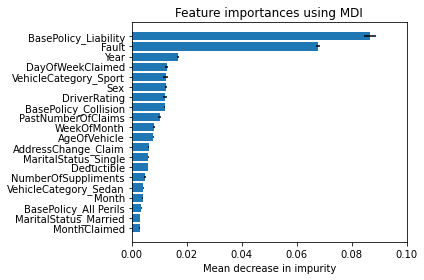

In [37]:
# RF-SMOTH-X5 
feature_names = [f"feature {i}" for i in range(X_res1.shape[1])]
results = permutation_importance(rf_smoth1, X_res1, y_res1, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_res1.columns)
forest_importances = pd.Series(importance, index=X_res1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.1)
fig.tight_layout()

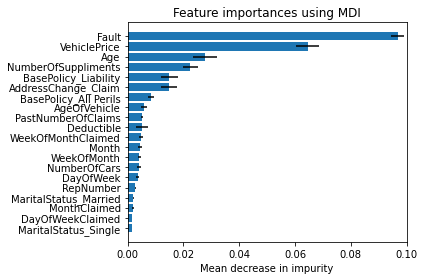

In [38]:
# RF-NearMiss-X5 
feature_names = [f"feature {i}" for i in range(X_under1.shape[1])]
results = permutation_importance(rf_nearmiss1, X_under1, y_under1, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_under1.columns)
forest_importances = pd.Series(importance, index=X_under1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.1)
fig.tight_layout()

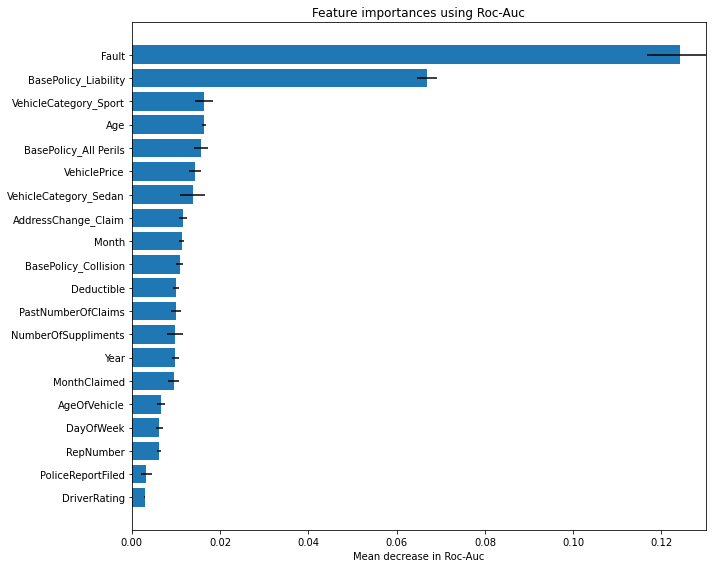

In [39]:
# RF-CS-X5 
feature_names = [f"feature {i}" for i in range(X_train1.shape[1])]
results = permutation_importance(rf_cs1, X_train1, y_train1, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_train1.columns)
forest_importances = pd.Series(importance, index=X_train1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using Roc-Auc")
ax.set_xlabel("Mean decrease in Roc-Auc")
plt.xlim(0,0.13)
fig.tight_layout()

NB- SMOTH

In [40]:
random.seed(2022)
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_smoth1 = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_smoth1.fit(X_res1, y_res1)
nb_smoth1_pred = nb_smoth1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'Year', 'BasePolicy_Liability'], dtype=object)

NB Smoth Compositon FS

In [41]:
comp_names1 = decomp_fs_names(X_train1, y_train1 , k = 16, m = 11)
naiv_b = BernoulliNB(alpha=1)
nb_comp_smoth1 = make_pipeline( StandardScaler(), naiv_b)
nb_comp_smoth1.fit(X_res1[comp_names1], y_res1)
nb_comp_smoth1_pred = nb_comp_smoth1.predict(X_valid1[comp_names1])


NB- NearMiss

In [42]:
np.random.seed(2022)
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_nearmiss1 = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_nearmiss1.fit(X_under1, y_under1)
nb_nearmiss1_pred = nb_nearmiss1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeek', 'Age', 'Fault', 'VehicleCategory_Sedan',
       'VehiclePrice', 'Deductible', 'PastNumberOfClaims', 'AgeOfVehicle',
       'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability'], dtype=object)

NB NearMiss Compositon FS

In [43]:
np.random.seed(2022)
naiv_b = BernoulliNB(alpha=1 , )
nb_comp_nearmiss1 = make_pipeline( StandardScaler(), naiv_b)
nb_comp_nearmiss1.fit(X_under1[comp_names1], y_under1)
nb_comp_nearmiss1_pred = nb_comp_nearmiss1.predict(X_valid1[comp_names1])


NB- CS

In [44]:

train_weights1 = sklearn.utils.compute_sample_weight({0: 1, 1: 16}, y_train1)

In [45]:
np.random.seed(2022)
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1 )
nb_cs1 = make_pipeline(mutual_filter, StandardScaler(),naiv_b)
kwargs1 = {nb_cs1.steps[-1][0] + '__sample_weight': train_weights1}
nb_cs1.fit(X_train1, y_train1, **kwargs1)
nb_cs1_pred = nb_cs1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]


array(['WeekOfMonthClaimed', 'Sex', 'Fault', 'VehicleCategory_Sport',
       'VehicleCategory_Sedan', 'Deductible', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'WitnessPresent', 'BasePolicy_Liability',
       'BasePolicy_All Perils'], dtype=object)

NB CS with compostion

In [46]:
np.random.seed(2022)
comp_names1 = decomp_fs_names(X_train1, y_train1 , k = 16, m = 11)
naiv_b = BernoulliNB(alpha=1)
nb_comp_cs1 = make_pipeline(StandardScaler(),naiv_b)
kwargs1 = {nb_comp_cs1.steps[-1][0] + '__sample_weight': train_weights1}
nb_comp_cs1.fit(X_train1[comp_names1], y_train1, **kwargs1)
nb_comp_cs1_pred = nb_comp_cs1.predict(X_valid1[comp_names1])




SVM - SMOTH

In [48]:
np.random.seed(2022)
mutual_filter = SelectKBest(mutual_info_classif, k=12)
svm = SVC(gamma='auto', random_state= 2022)
svm_smoth1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_smoth1.fit(X_res1, y_res1)
svm_smoth1_pred = svm_smoth1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonth', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Age', 'Fault', 'VehicleCategory_Sport',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'AddressChange_Claim',
       'NumberOfCars', 'BasePolicy_Liability'], dtype=object)

SVM - SMOTH COMPOSITION

In [50]:
np.random.seed(2022)
comp_names1 = decomp_fs_names(X_train1, y_train1 , k = 16, m = 12)
svm = SVC(gamma='auto', random_state= 2022)
svm_comp_smoth1 = make_pipeline(StandardScaler(), svm)
svm_comp_smoth1.fit(X_res1[comp_names1], y_res1)
svm_comp_smoth1_pred = svm_comp_smoth1.predict(X_valid1[comp_names1])

#### SVM - NearMiss

In [51]:
np.random.seed(2022)
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto', random_state= 2022)
svm_nearmiss1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_nearmiss1.fit(X_under1, y_under1)
svm_nearmiss1_pred = svm_nearmiss1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonth', 'DayOfWeek', 'MaritalStatus_Single', 'Age', 'Fault',
       'VehicleCategory_Sedan', 'VehiclePrice', 'Deductible',
       'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability'], dtype=object)

SVM NEARMISS COMPOSITION

In [52]:
comp_names1 = decomp_fs_names(X_train1, y_train1 , k = 16, m = 14)
svm = SVC(gamma='auto', random_state= 2022)
svm_comp_nearmiss1 = make_pipeline( StandardScaler(), svm)
svm_comp_nearmiss1.fit(X_under1[comp_names1], y_under1)
svm_comp_nearmiss1_pred = svm_comp_nearmiss1.predict(X_valid1[comp_names1])

### SVM - CS

In [53]:
np.random.seed(2022)
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto', class_weight = {0:1 , 1:16}, random_state= 2022)
svm_cs1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_cs1.fit(X_train1, y_train1)
svm_cs1_pred = svm_cs1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]


array(['WeekOfMonthClaimed', 'Sex', 'Age', 'Fault',
       'VehicleCategory_Sport', 'VehicleCategory_Sedan', 'Deductible',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'WitnessPresent', 'BasePolicy_Liability', 'BasePolicy_Collision',
       'BasePolicy_All Perils'], dtype=object)

SVM - CS COMPOSITION

In [54]:
comp_names1 = decomp_fs_names(X_train1, y_train1 , k = 16, m = 14)
svm = SVC(gamma='auto',  class_weight = {0:1 , 1:16}, random_state= 2022)
svm_comp_cs1 = make_pipeline(StandardScaler(), svm)
svm_comp_cs1.fit(X_res1[comp_names1], y_res1)
svm_comp_cs1_pred = svm_comp_cs1.predict(X_valid1[comp_names1])

# **Part 5 -  Evaluating preformance, model selection**

In [55]:
## define function for evaluating by few metrics and CM
def eval_pref(pred, y, classifier, model):
    precision, recall, thresholds = precision_recall_curve(y, pred)
    auc1 = auc(recall, precision)
    print(model,':')
    print('Accuarcy: ', round(accuracy_score(y,pred),4)*100, '%')
    print('Roc_Auc: ',round(roc_auc_score(y,pred),4)*100, '%')
    print('G-mean: ', round(geometric_mean_score(y,pred),4)*100, '%')
    print('F1-score: ',round(f1_score(y,pred),4)*100, '%')
    print('F2-score: ', round(fbeta_score(y, pred, beta=2),4)*100, '%')
    print('AUC-PR: ', round(auc1, 4)*100, '%')
    cm = confusion_matrix(y, pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
    disp.plot()

RF :
Accuarcy:  94.49 %
Roc_Auc:  50.0 %
G-mean:  0.0 %
F1-score:  0.0 %
F2-score:  0.0 %
AUC-PR:  52.76 %


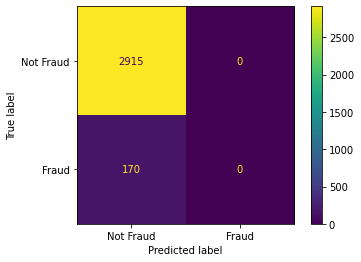

In [56]:
eval_pref(rf_pred, y_valid1, rf, 'RF')

RF-SMOTH1 :
Accuarcy:  75.11 %
Roc_Auc:  67.44 %
G-mean:  66.89 %
F1-score:  20.66 %
F2-score:  33.83 %
AUC-PR:  36.809999999999995 %


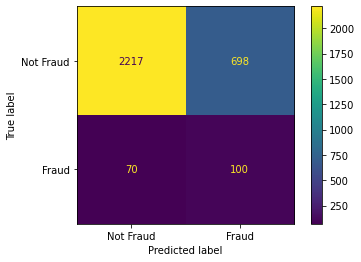

In [57]:
eval_pref(rf_smoth1_pred, y_valid1, rf_smoth1, 'RF-SMOTH1')

RF-NearMiss1 :
Accuarcy:  52.22 %
Roc_Auc:  66.13 %
G-mean:  64.25999999999999 %
F1-score:  15.870000000000001 %
F2-score:  30.73 %
AUC-PR:  45.78 %


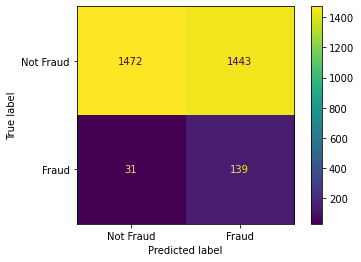

In [58]:
eval_pref(rf_nearmiss1_pred, y_valid1, rf_nearmiss1, 'RF-NearMiss1')

RF-CS :
Accuarcy:  59.64 %
Roc_Auc:  75.6 %
G-mean:  73.44000000000001 %
F1-score:  20.349999999999998 %
F2-score:  38.35 %
AUC-PR:  52.65 %


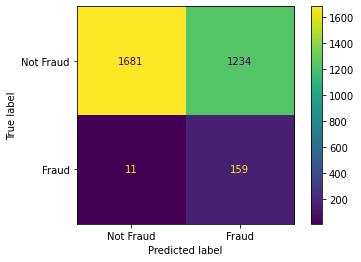

In [59]:
eval_pref(rf_cs1_pred, y_valid1, rf_cs1, 'RF-CS')

SVM-SMOTH1 :
Accuarcy:  72.92999999999999 %
Roc_Auc:  67.4 %
G-mean:  67.11 %
F1-score:  19.939999999999998 %
F2-score:  33.48 %
AUC-PR:  37.61 %


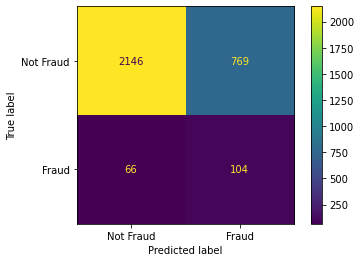

In [60]:
eval_pref(svm_smoth1_pred, y_valid1, svm_smoth1, 'SVM-SMOTH1')

SVM-COMP-SMOTH1 :
Accuarcy:  78.35 %
Roc_Auc:  55.31 %
G-mean:  48.870000000000005 %
F1-score:  13.020000000000001 %
F2-score:  19.56 %
AUC-PR:  20.830000000000002 %


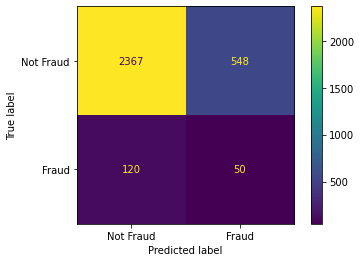

In [61]:
eval_pref(svm_comp_smoth1_pred, y_valid1, svm_comp_smoth1, 'SVM-COMP-SMOTH1')


SVM-NearMiss1 :
Accuarcy:  45.96 %
Roc_Auc:  60.33 %
G-mean:  58.13 %
F1-score:  13.489999999999998 %
F2-score:  26.669999999999998 %
AUC-PR:  42.58 %


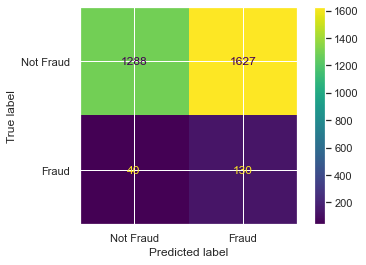

In [76]:
eval_pref(svm_nearmiss1_pred, y_valid1, svm_nearmiss1, 'SVM-NearMiss1')

In [ ]:
# input: train sample, m - number of fetures to select, K vec of clusters for each class, La - label for train
# K = (num_clusters_maority, num_clusters minority)
#  first phase: local clustering
    # for each class
        # kmeans_cluster(tr(class), K[class])
        # relab;e(label(class), label(new_subclass))
# 2nd_phase: feature sellect
    # select M best of mutual information method
#    return train_M_best

X_majority1 = X_train1[y_train1 == 0]
X_minority1 = X_train1[y_train1 == 1]
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=12, random_state=2022)
k_cluster = k_cluster.fit(X_majority1)
labels= k_cluster.labels_ + 2
labels = np.append(labels, np.repeat(1, sum(y_train1 == 1)))
X_new1= X_majority1.copy()
X_new1= X_new1.append(X_minority1)
X_comp_filter1 = SelectKBest(mutual_info_classif, k=12).fit(X_new1, labels)
# names chosen by compision based Feature Selection 
comp_names1 = X_comp_filter1.feature_names_in_[X_comp_filter1.get_support(indices=True)] 

/tmp/ipykernel_3156/1570703139.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_new1= X_new1.append(X_minority1)


SVM-COMP-NearMiss1 :
Accuarcy:  53.74 %
Roc_Auc:  53.92 %
G-mean:  53.92 %
F1-score:  11.42 %
F2-score:  21.69 %
AUC-PR:  31.52 %


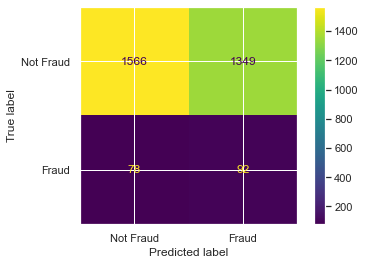

In [77]:
eval_pref(svm_comp_nearmiss1_pred, y_valid1, svm_comp_nearmiss1, 'SVM-COMP-NearMiss1')

SVM-CS1 :
Accuarcy:  60.39 %
Roc_Auc:  74.61 %
G-mean:  72.88 %
F1-score:  20.13 %
F2-score:  37.75 %
AUC-PR:  51.22 %


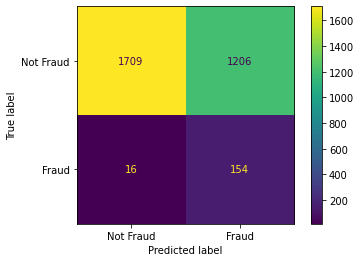

In [64]:
eval_pref(svm_cs1_pred, y_valid1, svm_cs1, 'SVM-CS1')

SVM-Comp-CS1 :
Accuarcy:  41.75 %
Roc_Auc:  63.36000000000001 %
G-mean:  58.52 %
F1-score:  14.219999999999999 %
F2-score:  28.599999999999998 %
AUC-PR:  48.03 %


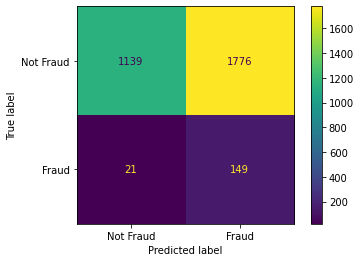

In [65]:
eval_pref(svm_comp_cs1_pred, y_valid1, svm_comp_cs1, 'SVM-Comp-CS1')

NB-SMOTH1 :
Accuarcy:  62.239999999999995 %
Roc_Auc:  67.0 %
G-mean:  66.79 %
F1-score:  17.43 %
F2-score:  32.01 %
AUC-PR:  41.89 %


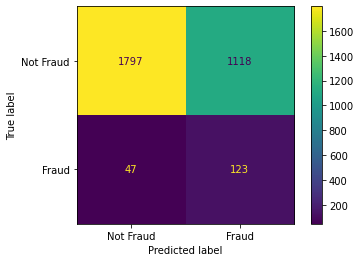

In [66]:
eval_pref(nb_smoth1_pred, y_valid1, nb_smoth1, 'NB-SMOTH1')

NB-COMP-SMOTH1 :
Accuarcy:  40.910000000000004 %
Roc_Auc:  64.02 %
G-mean:  58.52 %
F1-score:  14.37 %
F2-score:  28.99 %
AUC-PR:  49.18 %


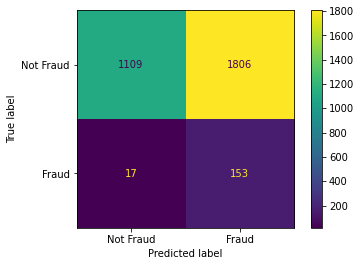

In [67]:
eval_pref(nb_comp_smoth1_pred, y_valid1, nb_comp_smoth1, 'NB-COMP-SMOTH1')

NB--nearmiss1 :
Accuarcy:  56.730000000000004 %
Roc_Auc:  65.19 %
G-mean:  64.49000000000001 %
F1-score:  15.98 %
F2-score:  30.25 %
AUC-PR:  42.52 %


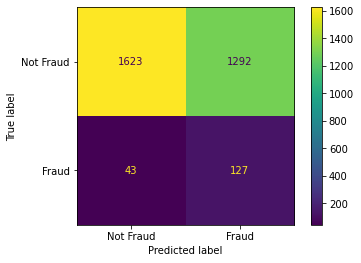

In [68]:
eval_pref(nb_nearmiss1_pred, y_valid1, nb_nearmiss1, 'NB--nearmiss1')

NB-COMP-nearmiss1 :
Accuarcy:  54.39000000000001 %
Roc_Auc:  60.08 %
G-mean:  59.74 %
F1-score:  13.84 %
F2-score:  26.36 %
AUC-PR:  38.019999999999996 %


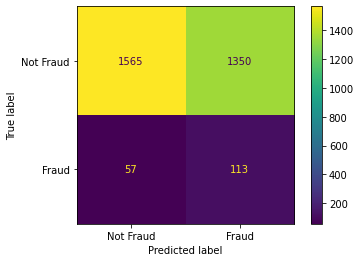

In [69]:
eval_pref(nb_comp_nearmiss1_pred, y_valid1, nb_comp_nearmiss1, 'NB-COMP-nearmiss1')

NB-CS1 :
Accuarcy:  56.14 %
Roc_Auc:  72.36 %
G-mean:  70.03 %
F1-score:  18.54 %
F2-score:  35.47 %
AUC-PR:  50.72 %


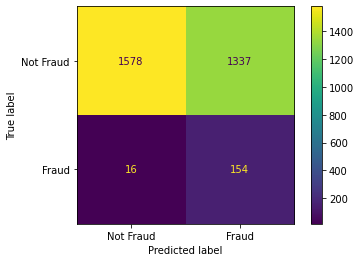

In [70]:
eval_pref(nb_cs1_pred, y_valid1, nb_cs1, 'NB-CS1')

NB-Comp CS :
Accuarcy:  39.48 %
Roc_Auc:  63.82 %
G-mean:  57.66 %
F1-score:  14.24 %
F2-score:  28.84 %
AUC-PR:  49.69 %


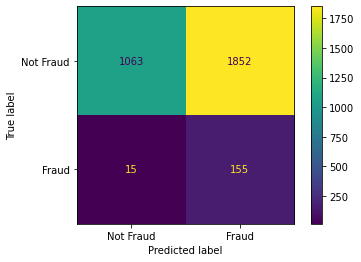

In [71]:
eval_pref(nb_comp_cs1_pred,y_valid1 , nb_comp_cs1, 'NB-Comp CS')

comparison by bar plots

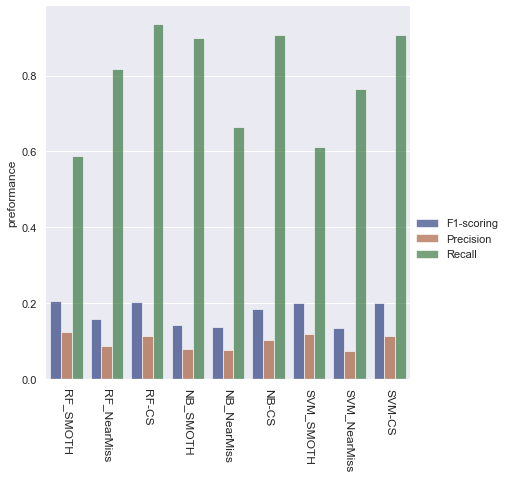

In [96]:
# presicion, recall, F1-score - without decompasition feature selection
dict_pre = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Precision',9) ,'scoring': [] }
dict_rec = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Recall',9), 'scoring': [] }
dict_f1 = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('F1-scoring',9), 'scoring': []  }
classifers_list = [rf_smoth1,rf_nearmiss1,rf_cs1, nb_comp_smoth1,nb_comp_nearmiss1,nb_comp_cs1,svm_smoth1,svm_nearmiss1,svm_cs1]
pred_list = [rf_smoth1_pred,rf_nearmiss1_pred,rf_cs1_pred, nb_comp_smoth1_pred,nb_comp_nearmiss1_pred,nb_cs1_pred,svm_smoth1_pred,svm_nearmiss1_pred,svm_cs1_pred]
dict_f1['scoring'] =  [f1_score(y_valid1,pred) for pred in pred_list]
dict_pre['scoring'] = [precision_score(y_valid1,pred) for pred in pred_list]
dict_rec['scoring'] = [recall_score(y_valid1, pred) for pred in pred_list]

models_results = pd.concat([pd.DataFrame.from_dict(dict_f1),pd.DataFrame.from_dict(dict_pre),pd.DataFrame.from_dict(dict_rec)])

sns.set_theme()


# Draw a nested barplot by models and scoring
g = sns.catplot(
    data=models_results, kind="bar",
    x="Model", y="scoring", hue="metric",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "preformance")
g.legend.set_title("")
g.set_xticklabels(rotation = -90, size = 12)



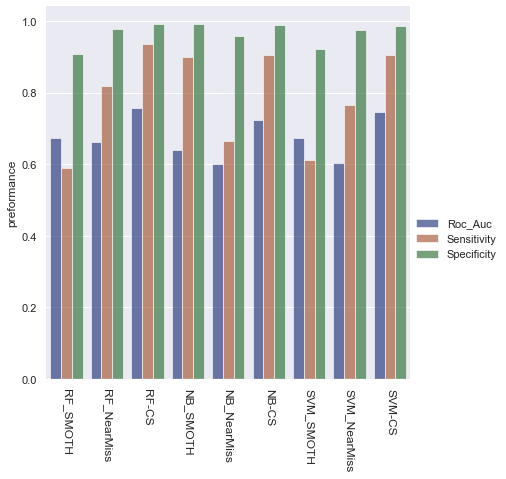

In [94]:
# senstivity, specificity, Roc Auc
dict_roc = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Roc_Auc',9) ,'scoring': [] }
dict_sens = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Sensitivity',9), 'scoring': [] }
dict_spec = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Specificity',9), 'scoring': []  }
pred_list = [rf_smoth1_pred,rf_nearmiss1_pred,rf_cs1_pred, nb_comp_smoth1_pred,nb_comp_nearmiss1_pred,nb_cs1_pred,svm_smoth1_pred,svm_nearmiss1_pred,svm_cs1_pred]


dict_roc['scoring'] =  [roc_auc_score(y_valid1,pred) for pred in pred_list]
dict_spec['scoring'] = [confusion_matrix(y_valid1, pred).ravel()[1]/(confusion_matrix(y_valid1, pred).ravel()[1]+confusion_matrix(y_valid1, pred).ravel()[2]) for pred in pred_list]
dict_sens['scoring'] = [recall_score(y_valid1, pred) for pred in pred_list]

models_results = pd.concat([pd.DataFrame.from_dict(dict_roc),pd.DataFrame.from_dict(dict_sens),pd.DataFrame.from_dict(dict_spec)])

sns.set_theme()


# Draw a nested barplot by models and scoring
g = sns.catplot(
    data=models_results, kind="bar",
    x="Model", y="scoring", hue="metric",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "preformance")
g.legend.set_title("")
g.set_xticklabels(rotation = -90, size = 12)



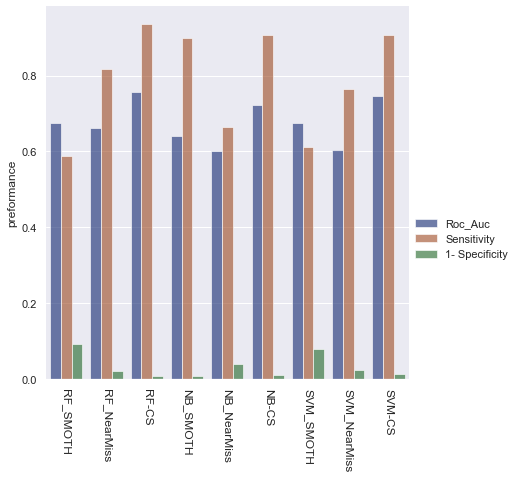

In [74]:
# Sensitivity, 1- Specificity, Recall
dict_roc = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Roc_Auc',9) ,'scoring': [] }
dict_sens = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Sensitivity',9), 'scoring': [] }
dict_1spec = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('1- Specificity',9), 'scoring': []  }
pred_list = [rf_smoth1_pred,rf_nearmiss1_pred,rf_cs1_pred, nb_comp_smoth1_pred,nb_comp_nearmiss1_pred,nb_cs1_pred,svm_smoth1_pred,svm_nearmiss1_pred,svm_cs1_pred]


dict_roc['scoring'] =  [roc_auc_score(y_valid1,pred) for pred in pred_list]
dict_1spec['scoring'] = [1-(confusion_matrix(y_valid1, pred).ravel()[1]/(confusion_matrix(y_valid1, pred).ravel()[1]+confusion_matrix(y_valid1, pred).ravel()[2])) for pred in pred_list]
dict_sens['scoring'] = [recall_score(y_valid1, pred) for pred in pred_list]

models_results = pd.concat([pd.DataFrame.from_dict(dict_roc),pd.DataFrame.from_dict(dict_sens),pd.DataFrame.from_dict(dict_1spec)])

sns.set_theme()


# Draw a nested barplot by models and scoring
g = sns.catplot(
    data=models_results, kind="bar",
    x="Model", y="scoring", hue="metric",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "preformance")
g.legend.set_title("")
g.set_xticklabels(rotation = -90, size = 12)

we can see RF-CS has the best preformance

# **part 6 - Test preformance of the chosen model**

chosen model :
Accuarcy:  62.45 %
Roc_Auc:  79.02 %
G-mean:  76.75 %
F1-score:  23.51 %
F2-score:  43.2 %
AUC-PR:  55.65 %


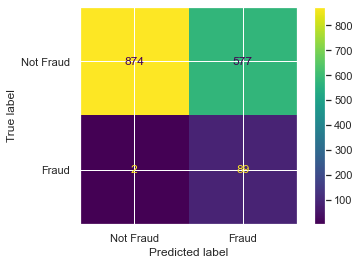

In [75]:
rf_cs1_pred_test = rf_cs1.predict(X_test1)
eval_pref(rf_cs1_pred_test,y_test1 , rf_cs1, 'chosen model') 